In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [35]:
PALETA = {
    'arabica': '#02A556',    # Verde
    'robusta': '#CC2229',    # Vermelho
    'spread':  '#F1AC24',    # Laranja/Ouro (Adicionado agora!)
    'texto':   '#022B49',    # Azul Escuro
    'grid':    '#0393BD',    # Azul Claro
    'fundo_bbox': 'white'    # Branco
}


In [36]:
sns.set_theme(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 6) 

# Carregando os dados
df = pd.read_parquet('../data/processed/dados_completos_commodities.parquet')

print("--- Dados Prontos ---")
display(df.tail(n = 10))

--- Dados Prontos ---


,level_0,index,Date,Dolar,Arabica,Robusta,Arabica_BRL,Robusta_BRL
1290,1290,1290,2026-01-05,5.4216,359.350006,3844.0,2577.07,1250.44
1291,1291,1291,2026-01-06,5.4075,373.850006,3930.0,2674.08,1275.09
1292,1292,1292,2026-01-07,5.3720,375.450012,3876.0,2667.90,1249.31
1293,1293,1293,2026-01-08,5.3839,372.350006,3866.0,2651.73,1248.85
1294,1294,1294,2026-01-09,5.3866,357.649994,3837.0,2548.32,1240.10
1295,1295,1295,2026-01-12,5.3703,356.049988,3845.0,2529.24,1238.93
1296,1296,1296,2026-01-13,5.3737,360.250000,3882.0,2560.70,1251.64
1297,1297,1297,2026-01-14,5.3713,356.000000,3879.0,2529.36,1250.12
1298,1298,1298,2026-01-15,5.3961,358.100006,3923.0,2556.03,1270.13
1299,1299,1299,2026-01-16,5.3694,355.100006,4013.0,2522.07,1292.84


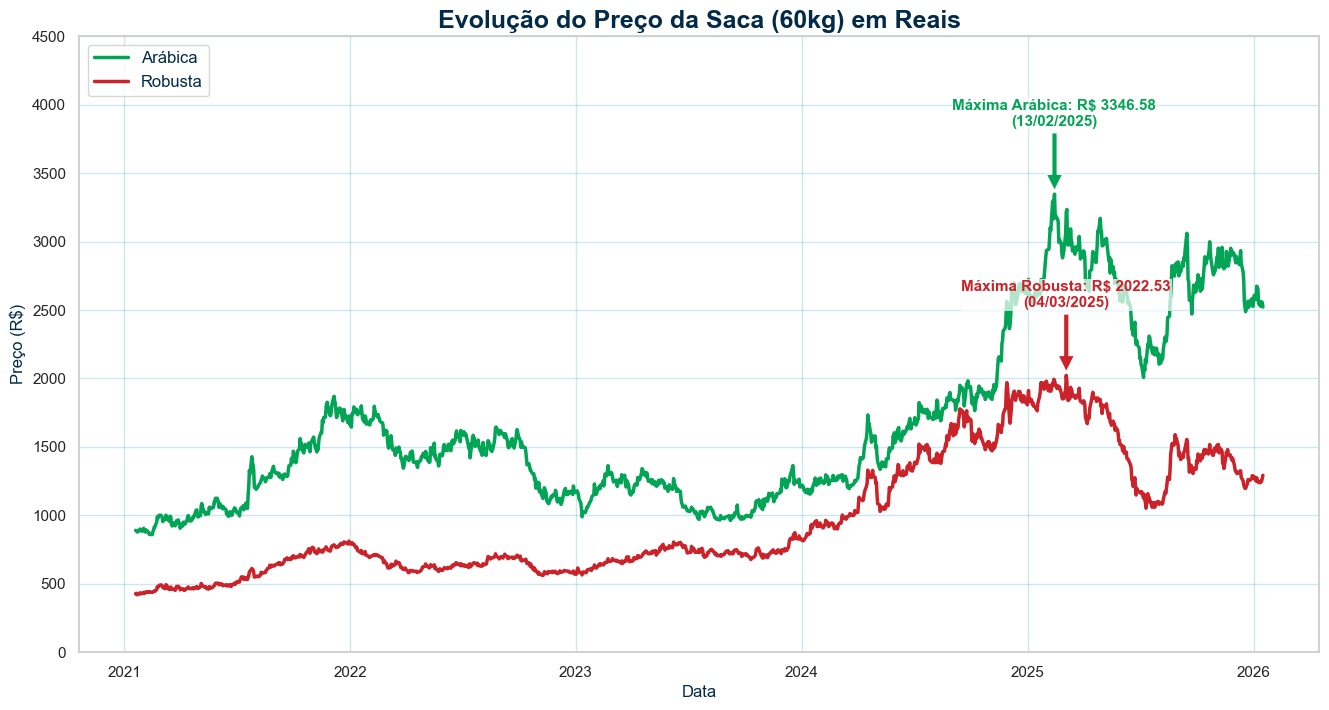

In [37]:
# --- 1. PLOTAGEM ---
plt.figure(figsize=(16, 8))

# Linhas 
sns.lineplot(data=df, x='Date', y='Arabica_BRL', label='Arábica', color=PALETA['arabica'], linewidth=2.5)
sns.lineplot(data=df, x='Date', y='Robusta_BRL', label='Robusta', color=PALETA['robusta'], linewidth=2.5)

# Configuração da caixinha de fundo (Padronizada)
bbox_args = dict(facecolor=PALETA['fundo_bbox'], alpha=0.7, edgecolor='none', pad=0.5)

# --- 2. ANOTAÇÃO: MÁXIMA DO ARÁBICA ---
max_price_arabica = df['Arabica_BRL'].max()
max_date_arabica = df.loc[df['Arabica_BRL'] == max_price_arabica, 'Date'].iloc[0]
date_str_arabica = max_date_arabica.strftime('%d/%m/%Y')

# Teto alto para caber as anotações
plt.ylim(0, 4500) 

plt.annotate(f'Máxima Arábica: R$ {max_price_arabica}\n({date_str_arabica})', 
             xy=(max_date_arabica, max_price_arabica),
             xytext=(max_date_arabica, max_price_arabica + 500), 
             arrowprops=dict(facecolor=PALETA['arabica'], shrink=0.05), # Seta Verde
             fontsize=11, fontweight='bold', color=PALETA['arabica'],   # Texto Verde
             ha='center',
             bbox=bbox_args)

# --- 3. ANOTAÇÃO: MÁXIMA DO ROBUSTA ---
max_price_robusta = df['Robusta_BRL'].max()
max_date_robusta = df.loc[df['Robusta_BRL'] == max_price_robusta, 'Date'].iloc[0]
date_str_robusta = max_date_robusta.strftime('%d/%m/%Y')

plt.annotate(f'Máxima Robusta: R$ {max_price_robusta}\n({date_str_robusta})', 
             xy=(max_date_robusta, max_price_robusta),
             xytext=(max_date_robusta, max_price_robusta + 500), 
             arrowprops=dict(facecolor=PALETA['robusta'], shrink=0.05), # Seta Vermelha
             fontsize=11, fontweight='bold', color=PALETA['robusta'],   # Texto Vermelho
             ha='center',
             bbox=bbox_args) 

# --- 4. DECORAÇÃO FINAL (Identidade Visual) ---
plt.title('Evolução do Preço da Saca (60kg) em Reais', fontsize=18, fontweight='bold', color=PALETA['texto'])
plt.ylabel('Preço (R$)', fontsize=12, color=PALETA['texto'])
plt.xlabel('Data', fontsize=12, color=PALETA['texto'])

# Legenda e Grade
plt.legend(loc='upper left', fontsize=12, labelcolor=PALETA['texto'])
plt.grid(True, color=PALETA['grid'], alpha=0.2) # Grade azul claro bem suave

plt.show()

In [38]:
# --- 1. CÁLCULO DO SPREAD ---
# Spread = Preço do Arábica (Nobre) - Preço do Robusta (Comum)
df['Spread'] = df['Arabica_BRL'] - df['Robusta_BRL']

# --- 2. PROVA REAL (VALIDAÇÃO) ---
print("--- 🔍 Conferência dos Cálculos ---")
print("Veja se a coluna 'Spread' é exatamente a subtração das outras duas:")

# Selecionamos apenas as colunas envolvidas para facilitar a leitura visual
colunas_conferencia = ['Date', 'Arabica_BRL', 'Robusta_BRL', 'Spread']
display(df[colunas_conferencia].tail())

--- 🔍 Conferência dos Cálculos ---
Veja se a coluna 'Spread' é exatamente a subtração das outras duas:


,Date,Arabica_BRL,Robusta_BRL,Spread
1295,2026-01-12,2529.24,1238.93,1290.31
1296,2026-01-13,2560.70,1251.64,1309.06
1297,2026-01-14,2529.36,1250.12,1279.24
1298,2026-01-15,2556.03,1270.13,1285.90
1299,2026-01-16,2522.07,1292.84,1229.23


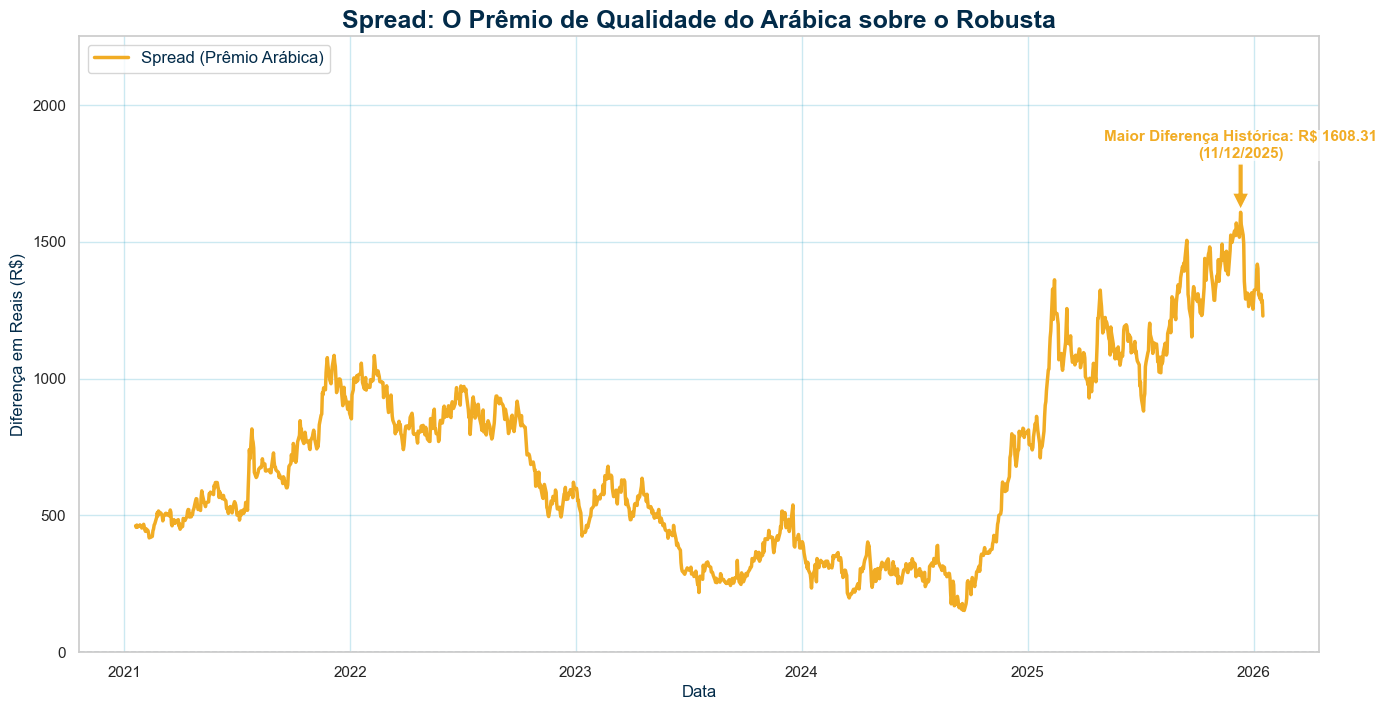

In [39]:
# --- 3. CONFIGURAÇÃO VISUAL (Estilo Padronizado) ---
plt.figure(figsize=(16, 8))

# Configuração da caixinha de fundo (igual ao anterior)
bbox_args = dict(facecolor=PALETA['fundo_bbox'], alpha=0.7, edgecolor='none', pad=0.5)

# --- 4. PLOTAGEM ---
# Usamos PALETA['spread'] (Laranja/Ouro)
sns.lineplot(data=df, x='Date', y='Spread', 
             label='Spread (Prêmio Arábica)', 
             color=PALETA['spread'], 
             linewidth=2.5)

# --- 5. ANOTAÇÃO DA MÁXIMA ---
max_spread = df['Spread'].max()
max_date_spread = df.loc[df['Spread'] == max_spread, 'Date'].iloc[0]
date_str_spread = max_date_spread.strftime('%d/%m/%Y')

# Teto alto para caber o texto
plt.ylim(0, df['Spread'].max() * 1.4) 

# Anotação Blindada usando as cores da paleta
plt.annotate(f'Maior Diferença Histórica: R$ {max_spread:.2f}\n({date_str_spread})', 
             xy=(max_date_spread, max_spread),
             xytext=(max_date_spread, max_spread + 200), 
             arrowprops=dict(facecolor=PALETA['spread'], shrink=0.05), # Seta Laranja
             fontsize=11, fontweight='bold', color=PALETA['spread'],   # Texto Laranja
             ha='center',
             bbox=bbox_args)

# --- 6. DECORAÇÃO FINAL (Identidade Visual) ---
plt.title('Spread: O Prêmio de Qualidade do Arábica sobre o Robusta', 
          fontsize=18, fontweight='bold', color=PALETA['texto'])
plt.ylabel('Diferença em Reais (R$)', fontsize=12, color=PALETA['texto'])
plt.xlabel('Data', fontsize=12, color=PALETA['texto'])

# Legenda e Grade Padronizadas
plt.legend(loc='upper left', fontsize=12, labelcolor=PALETA['texto'])
plt.axhline(0, color=PALETA['texto'], linestyle='--', linewidth=1) # Linha de base (Azul Escuro)
plt.grid(True, color=PALETA['grid'], alpha=0.2) # Grade (Azul Claro suave)

plt.show()